In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Load data
df_raw = pd.read_csv("datakit_farming_dataset.csv")

# Filter dataset by English texts (1min42sec)
df_english = df_raw[df_raw["question_language"] == "eng"]
display(df_english.head(5))
df_english.to_csv("english.csv", index=False)

# Filter dataset by English Uganda texts (41sec)
df_english_uganda = df_english[df_english["question_user_country_code"] == "ug"]
df_english_uganda.info()

df_english_uganda.to_csv("uganda_english.csv", index=False)

,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,...,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00
9,3849084,6642,eng,Q-i have stock rabbit's urine for 5 weeks mash...,rabbit,2017-11-22 12:25:10+00,3852272,35690,eng,Q165#Ksh120,...,ke,NaN,NaN,2015-07-28 17:12:04+00,farmer,zombie,ke,NaN,NaN,2015-11-14 19:59:19+00
15,3849098,526375,eng,Q J Have Mi 10000 Can J Start Aproject Of Pout...,poultry,2017-11-22 12:25:12+00,3859675,522795,eng,Q5 10000 is not enough because the materials n...,...,ug,NaN,NaN,2017-11-22 12:10:37+00,farmer,zombie,ug,NaN,NaN,2017-11-21 07:08:05+00
16,3849100,237506,eng,WHERE DO I GET SEEDS OF COCONUT?,pig,2017-11-22 12:25:12+00,4263505,412335,eng,"Q11:try kisumu ,migori ,homa bay,siaya and any...",...,ke,NaN,NaN,2017-06-27 10:45:20+00,farmer,destroyed,ke,NaN,NaN,2017-10-03 17:35:12+00
17,3849100,237506,eng,WHERE DO I GET SEEDS OF COCONUT?,coconut,2017-11-22 12:25:12+00,3852604,412335,eng,Q11:coast Cereals,...,ke,NaN,NaN,2017-06-27 10:45:20+00,farmer,destroyed,ke,NaN,NaN,2017-10-03 17:35:12+00


<class 'pandas.core.frame.DataFrame'>
Index: 4464980 entries, 1 to 20244972
Data columns (total 24 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   question_id                 int64 
 1   question_user_id            int64 
 2   question_language           object
 3   question_content            object
 4   question_topic              object
 5   question_sent               object
 6   response_id                 int64 
 7   response_user_id            int64 
 8   response_language           object
 9   response_content            object
 10  response_topic              object
 11  response_sent               object
 12  question_user_type          object
 13  question_user_status        object
 14  question_user_country_code  object
 15  question_user_gender        object
 16  question_user_dob           object
 17  question_user_created_at    object
 18  response_user_type          object
 19  response_user_status        object
 20  respon

In [2]:
# Analysis: Compare blocked users to non-blocked users 

# Subset: Filter by question_language = English, and country_code = "ug" (Uganda)

df = pd.read_csv("uganda_english.csv")
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464980 entries, 0 to 4464979
Data columns (total 24 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   question_id                 int64 
 1   question_user_id            int64 
 2   question_language           object
 3   question_content            object
 4   question_topic              object
 5   question_sent               object
 6   response_id                 int64 
 7   response_user_id            int64 
 8   response_language           object
 9   response_content            object
 10  response_topic              object
 11  response_sent               object
 12  question_user_type          object
 13  question_user_status        object
 14  question_user_country_code  object
 15  question_user_gender        object
 16  question_user_dob           object
 17  question_user_created_at    object
 18  response_user_type          object
 19  response_user_status        object
 20  re

None

In [3]:
# Create table of individual users

# parse timestamps
df["question_sent"] = pd.to_datetime(df["question_sent"], format='mixed')
df["response_sent"] = pd.to_datetime(df["response_sent"], format='mixed')
df["question_user_created_at"] = pd.to_datetime(df["question_user_created_at"], format='mixed')
df["response_user_created_at"] = pd.to_datetime(df["response_user_created_at"], format='mixed')

# keep the original asker id for later aggregation
df["asker_id"] = df["question_user_id"]

# create rows for user questions
q = df.rename(columns={
    "question_user_id": "user_id",
    "question_user_status": "user_status",
    "question_user_created_at": "user_created_at",
    "question_sent": "timestamp"
})[[
    "user_id",
    "user_status",
    "user_created_at",
    "timestamp",
    "question_id",
    "response_id",
    "asker_id"      
]]

q["is_question"] = True
q["is_response"] = False

# create rows for user responses
r = df.rename(columns={
    "response_user_id": "user_id",
    "response_user_status": "user_status",
    "response_user_created_at": "user_created_at",
    "response_sent": "timestamp"
})[[
    "user_id",
    "user_status",
    "user_created_at",
    "timestamp",
    "question_id",
    "response_id",
    "asker_id"  
]]

r["is_question"] = False
r["is_response"] = True

# concatenate question and response rows
u = pd.concat([q, r], ignore_index=True)

display(len(u["user_id"]))
display(len(u["user_id"].unique()))


8929960

265388

In [4]:
# drop duplicate entries (multiple topic rows per question or response)

u = u.drop_duplicates()
print("Number of unique question-response pairs")
display(len(u["response_id"].unique()))
print("Number of unique users")
display(len(u["user_id"].unique()))
display(u.info())

Number of unique question-response pairs


3497774

Number of unique users


265388

<class 'pandas.core.frame.DataFrame'>
Index: 6995548 entries, 0 to 8929959
Data columns (total 9 columns):
 #   Column           Dtype              
---  ------           -----              
 0   user_id          int64              
 1   user_status      object             
 2   user_created_at  datetime64[ns, UTC]
 3   timestamp        datetime64[ns, UTC]
 4   question_id      int64              
 5   response_id      int64              
 6   asker_id         int64              
 7   is_question      bool               
 8   is_response      bool               
dtypes: bool(2), datetime64[ns, UTC](2), int64(4), object(1)
memory usage: 440.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 265388 entries, 32463 to 3733264
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   user_status                       265388 non-null  object             
 1   user_created_at                   265388 non-null  datetime64[ns, UTC]
 2   user_last_interaction             265388 non-null  datetime64[ns, UTC]
 3   user_tenure                       265388 non-null  int64              
 4   num_questions_asked               265388 non-null  float64            
 5   num_responses                     265388 non-null  float64            
 6   num_unique_questions_answered     265388 non-null  float64            
 7   max_responses_to_single_question  265388 non-null  float64            
 8   num_users_reached                 265388 non-null  float64            
 9   total_num_messages_sent           265388 non-nul

None

,user_tenure,num_questions_asked,num_responses,num_unique_questions_answered,max_responses_to_single_question,num_users_reached,total_num_messages_sent
count,265388.000000,265388.000000,265388.000000,265388.000000,265388.000000,265388.000000,265388.000000
mean,369.165380,4.805865,13.179850,12.391314,1.066921,12.021538,17.985715
std,377.086521,16.440277,54.404188,49.556413,6.521787,44.885621,63.092069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,256.000000,2.000000,2.000000,2.000000,1.000000,2.000000,5.000000
75%,581.000000,5.000000,10.000000,9.000000,1.000000,9.000000,15.000000
max,2107.000000,3610.000000,6684.000000,6397.000000,2020.000000,5136.000000,7269.000000


user_status
live         162052
zombie        66038
destroyed     25958
blocked       11340
Name: count, dtype: int64

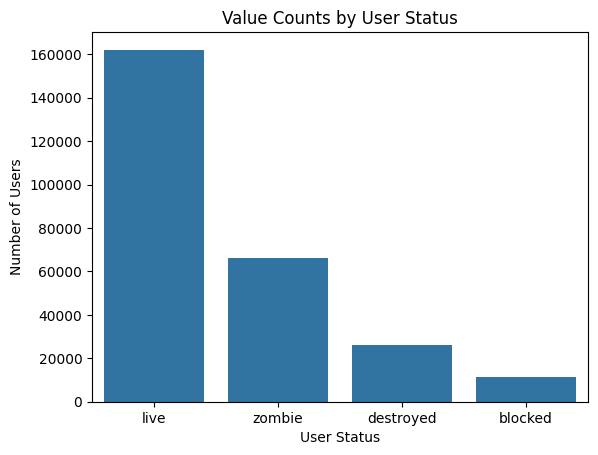

In [5]:
# aggregate data for individual users

num_questions_asked = u[u["is_question"]].groupby("user_id")["question_id"].nunique()

num_responses = u[u["is_response"]].groupby("user_id")["response_id"].count()

num_unique_questions_answered = (
    u[u["is_response"]].groupby("user_id")["question_id"].nunique()
)

num_users_reached = (
    u[u["is_response"]]
    .groupby("user_id")["asker_id"]
    .nunique()
)
max_responses_temp = (
    u[u["is_response"]]
    .groupby(["user_id", "question_id"])["response_id"]
    .count()
)

max_responses_to_single_question = max_responses_temp.groupby("user_id").max()

user_created_at = u.groupby("user_id")["user_created_at"].min()

user_status = u.groupby("user_id")["user_status"].first()

user_last_interaction = u.groupby("user_id")["timestamp"].max()

user_tenure = (user_last_interaction - user_created_at).dt.days

# create summary dataframe
summary = pd.DataFrame({
    "user_status": user_status,
    "user_created_at": user_created_at,
    "user_last_interaction": user_last_interaction,
    "user_tenure": user_tenure,
    "num_questions_asked": num_questions_asked,
    "num_responses": num_responses,
    "num_unique_questions_answered": num_unique_questions_answered,
    "max_responses_to_single_question": max_responses_to_single_question,
    "num_users_reached": num_users_reached
})

# fill NaN with 0 (users who had 0 responses or 0 questions)
summary = summary.fillna({
    "num_questions_asked": 0,
    "num_responses": 0,
    "num_unique_questions_answered": 0,
    "max_responses_to_single_question": 0,
    "num_users_reached": 0
})

# add total number of messages sent after addressing missing data
summary["total_num_messages_sent"] = summary["num_questions_asked"] + summary["num_responses"]

display(summary.info())
display(summary.describe())

# value counts of user_status
vc = summary["user_status"].value_counts()
display(vc)

# plot value counts of user status
sns.barplot(x=vc.index, y=vc.values)
plt.title("Value Counts by User Status")
plt.xlabel("User Status")
plt.ylabel("Number of Users")
plt.show()


,user_tenure,num_questions_asked,num_responses,num_unique_questions_answered,max_responses_to_single_question,total_num_messages_sent,num_users_reached
user_status,,,,,,,
blocked,510.216931,16.577425,36.582363,32.949647,2.031305,53.159788,31.488095
destroyed,233.242507,3.866823,16.673473,15.776562,1.101318,20.540296,15.064836
live,465.676616,4.961593,13.832609,13.073908,1.128743,18.794202,12.751413
zombie,161.541325,2.771435,6.186105,5.855356,0.736091,8.957540,5.691450


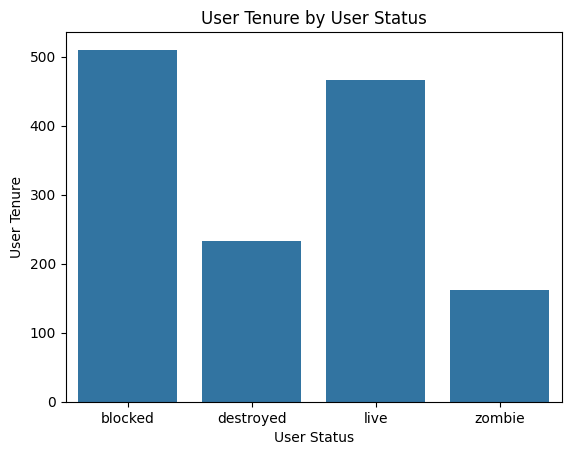

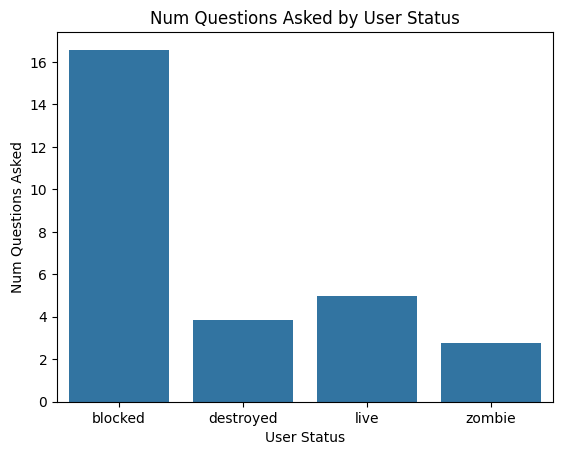

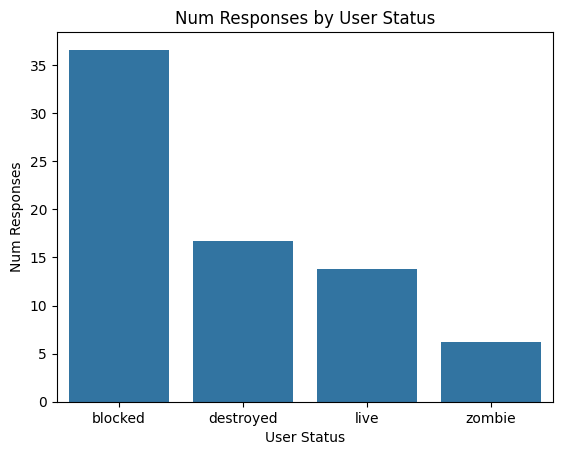

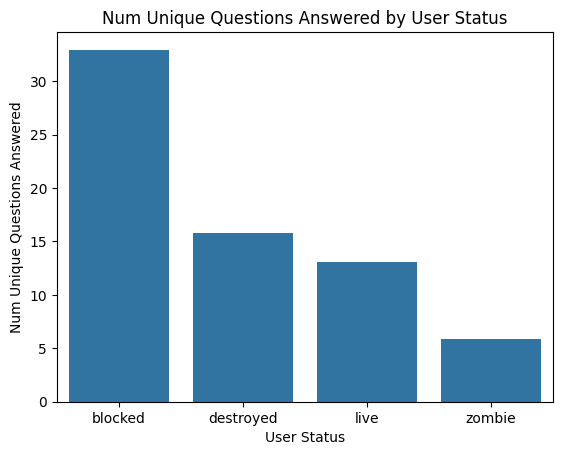

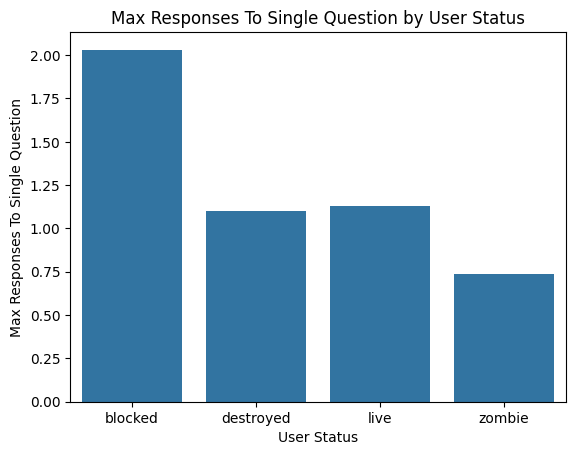

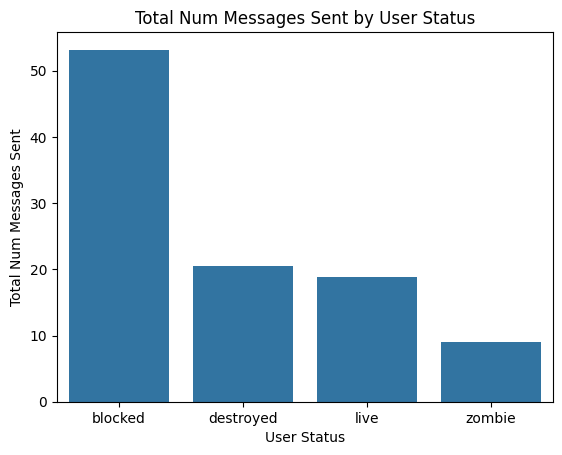

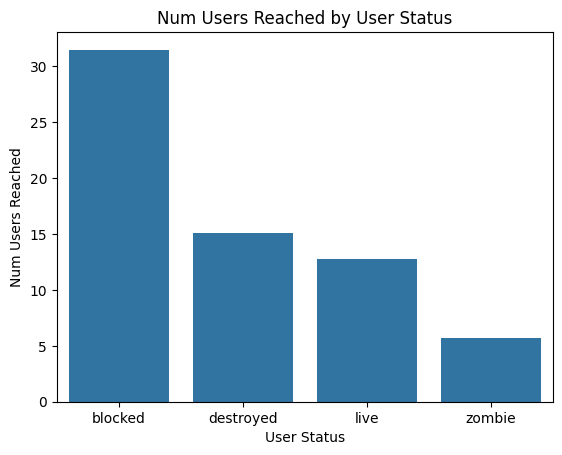

In [6]:
# summary stats

# Summary stats by blocked vs non-blocked
summary_main = summary.groupby("user_status").agg({
    "user_tenure": "mean",
    "num_questions_asked": "mean",
    "num_responses": "mean",
    "num_unique_questions_answered": "mean",
    "max_responses_to_single_question": "mean",
    "total_num_messages_sent": "mean",
    "num_users_reached": "mean"
})

display(summary_main)

for i, col in enumerate(["user_tenure", "num_questions_asked", "num_responses", "num_unique_questions_answered", "max_responses_to_single_question", "total_num_messages_sent", "num_users_reached"]):
    ylabel = " ".join(word.capitalize() for word in col.split("_"))
    xlabel = "User Status"
    title = f'{ylabel} by {xlabel}'
    sns.barplot(data=summary_main, x="user_status", y=col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

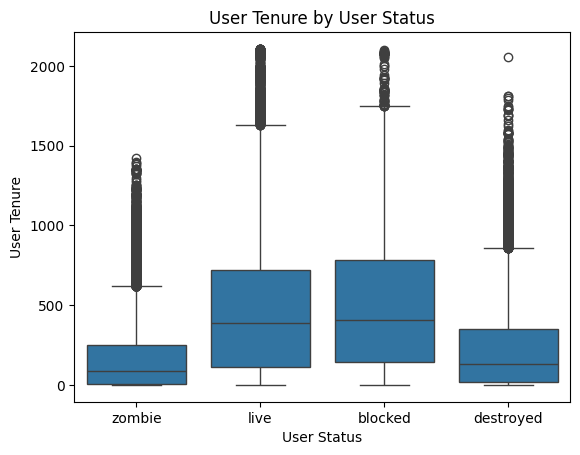

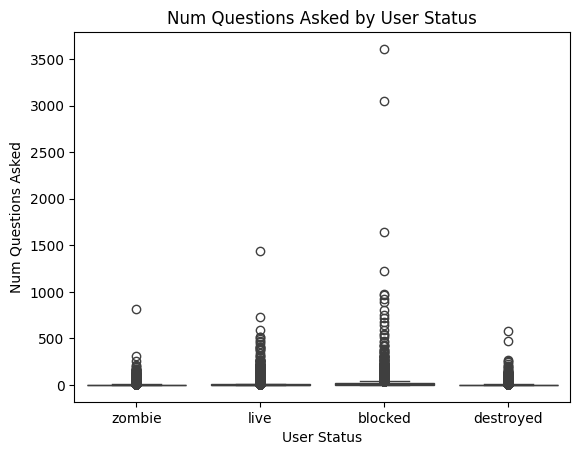

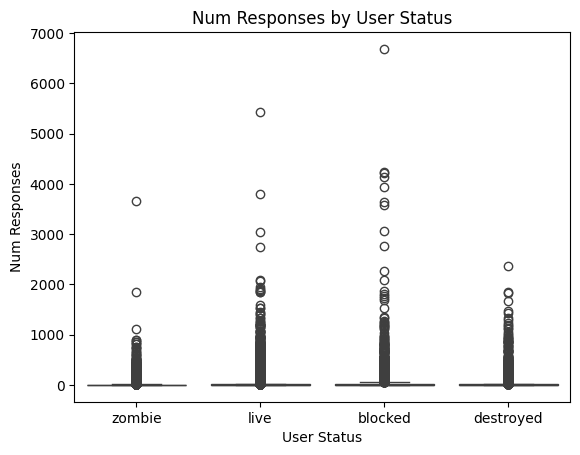

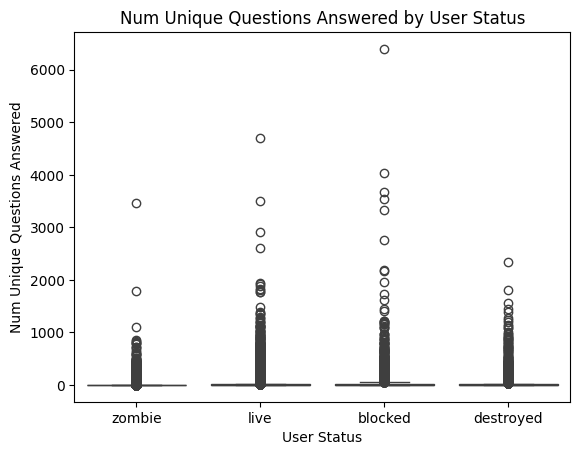

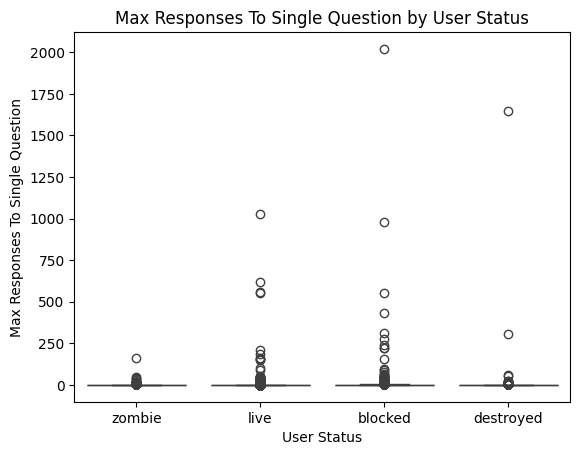

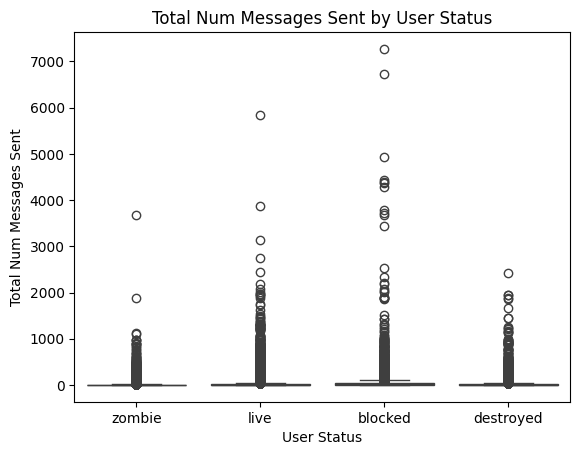

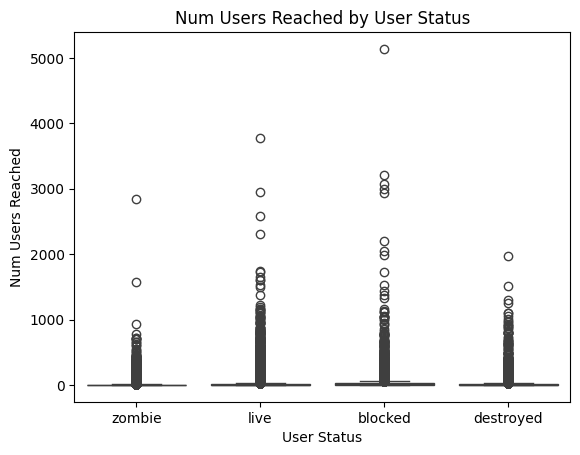

In [7]:
# boxplots of aggregated data by user_status

for i, col in enumerate(["user_tenure", "num_questions_asked", "num_responses", "num_unique_questions_answered", "max_responses_to_single_question", "total_num_messages_sent", "num_users_reached"]):
    ylabel = " ".join(word.capitalize() for word in col.split("_"))
    xlabel = "User Status"
    title = f'{ylabel} by {xlabel}'
    sns.boxplot(data=summary, x="user_status", y=col)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.show()

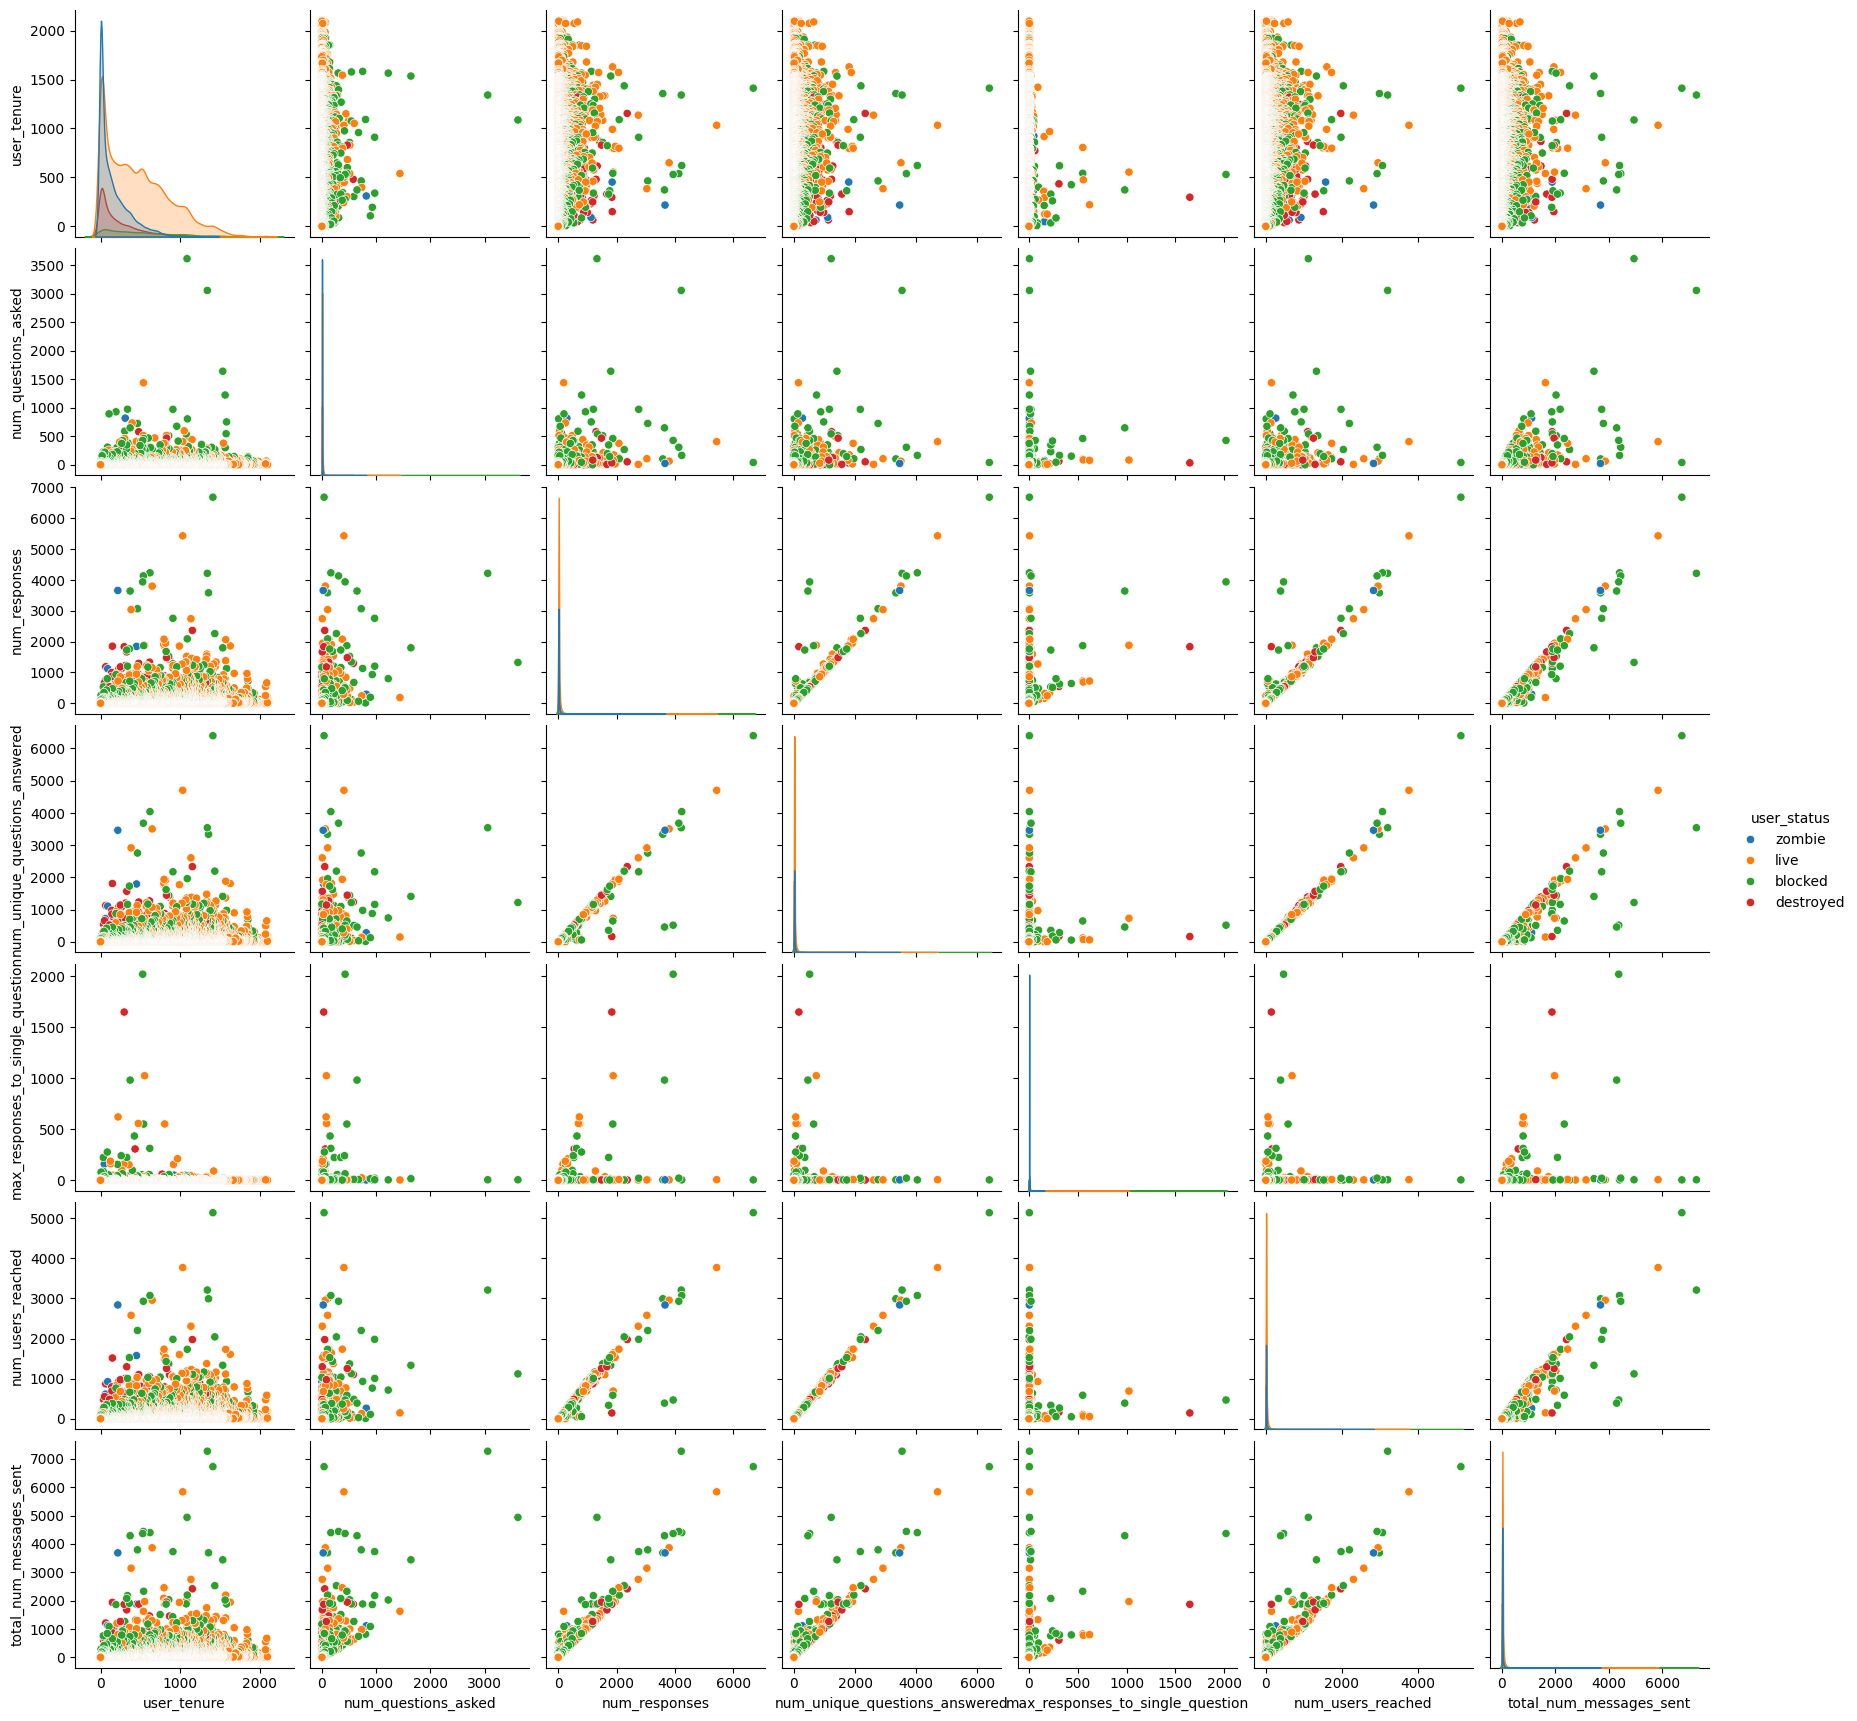

In [8]:
# pairplot of aggregated data

sns.pairplot(summary, hue="user_status", diag_kind='kde')
plt.show()

In [20]:
# detect and remove outliers using 1.5 IQR rule

cols = [
    "user_tenure",
    "num_questions_asked",
    "num_responses",
    "num_unique_questions_answered",
    "max_responses_to_single_question",
    "total_num_messages_sent",
    "num_users_reached",
]

mask = pd.Series(True, index=summary.index)

for col in cols:
    print("\n" + "="*70)
    print(f"Checking column: {col}")

    # Compute IQR ranges
    Q1 = summary[col].quantile(0.25)
    Q3 = summary[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = max(0, Q1 - 1.5 * IQR)
    upper = Q3 + 1.5 * IQR

    print(f"  Q1: {Q1:.4f}")
    print(f"  Q3: {Q3:.4f}")
    print(f"  IQR: {IQR:.4f}")
    print(f"  Lower bound: {lower:.4f}")
    print(f"  Upper bound: {upper:.4f}")

    # Identify outliers
    col_mask = summary[col].between(lower, upper)
    removed = summary[~col_mask]

    print(f"  → Outliers found: {len(removed)} rows")

    if len(removed) > 0:
        print("    Outlier preview (first 5, sorted ascending):")
        print(
            removed[[col]]
            .sort_values(by=col, ascending=True)
            .head(5)
        )

    # Combine mask with running mask
    mask &= col_mask

print("\n" + "="*70)
print(f"Total rows before filtering: {len(summary)}")
print(f"Total rows after filtering:  {mask.sum()}")
print(f"Total rows removed:          {len(summary) - mask.sum()}")
print("="*70 + "\n")

filtered_summary = summary[mask].copy()


Checking column: user_tenure
  Q1: 49.0000
  Q3: 581.0000
  IQR: 532.0000
  Lower bound: 0.0000
  Upper bound: 1379.0000
  → Outliers found: 5235 rows
    Outlier preview (first 5, sorted ascending):
         user_tenure
user_id             
156748          1380
148377          1380
515333          1380
493489          1380
499534          1380

Checking column: num_questions_asked
  Q1: 1.0000
  Q3: 5.0000
  IQR: 4.0000
  Lower bound: 0.0000
  Upper bound: 11.0000
  → Outliers found: 25035 rows
    Outlier preview (first 5, sorted ascending):
         num_questions_asked
user_id                     
404634                  12.0
466180                  12.0
466355                  12.0
1159120                 12.0
1158908                 12.0

Checking column: num_responses
  Q1: 0.0000
  Q3: 10.0000
  IQR: 10.0000
  Lower bound: 0.0000
  Upper bound: 25.0000
  → Outliers found: 29888 rows
    Outlier preview (first 5, sorted ascending):
         num_responses
user_id               
1

In [ ]:
# spot check question and response content in smallest removed outliers to guide future questions
print("Max Responses to Single Question Removed User Spot Check")
removed_max_responses_questions = df[(df["question_user_id"] == 41395)]
removed_max_responses_responses = df[(df["response_user_id"] == 41395)]
display(set(removed_max_responses_questions["question_content"]))
display(set(removed_max_responses_responses["response_content"]))


Max Responses to Single Question Removed User Spot Check


{'Q how do we correct a retained placenta in cows?',
 'hat a farmer can rescue a newly attacked garden and harvest much then can repay the credit later after sake of the produce.'}

{'Q100 all birds lay once a day because egg decelopment takes 24 hours',
 'Q101 one is required to use traps because they are environmental friendly.',
 'Q102 Blood cells are the cells which are produced during hematopoiesis and found mainly in the blood.',
 'Q103 rabbit prices range from area to area for example in kanungu a mature rabbit can be bought at 15000 or 20000 Ugandan shillings',
 'Q104 maise leaf rust is a fungal disease and can be controlled by using fungicides.',
 'Q106 a goat with diarrhoea should be either given dewormers like liverfas diamond or sulphur tablets.',
 'Q108 dry maize can be protected from pests by proper drying, disinfecting the storage room and materials or even adding fumigants.',
 'Q109 a cross breed should produce 10 to 15 ltrs per milking',
 'Q110 tomato mosaic is caused by a virus.',
 'Q111 all fresh grasses have high moisture content for example Napier grass, sesbania, Guatemala, lablab, and fresh maize leaves',
 'Q113 you may use coccidiostats to 

In [ ]:
print("Total Num Messages Sent Removed User Spot Check")
total_num_messages_sent_questions = df[(df["question_user_id"] == 2627471)]
total_num_messages_sent_responses = df[(df["response_user_id"] == 2627471)]
display(set(total_num_messages_sent_questions["question_content"]))
display(set(total_num_messages_sent_responses["response_content"]))
display(total_num_messages_sent_responses[["question_content", "question_user_status", "response_content", "response_user_status"]])

# This user started with appropriate questions and answers 
# then started answering sexual-related questions and was blocked

Total Num Messages Sent Removed User Spot Check


{'How do i prepare coffee 4 sale?',
 'Hw are you we-farm?',
 'Q.\nDoes fermanted grass contains minerals and vitamins the animals need like as in raw-grass?',
 'Q.\nDoes rainfall affect sugarcane productn wen propagated?',
 'Q.\nHw do we harvest coco?',
 'Q.\nI hv my coffee beds bt  which stage appropriate 4 transplanting them?',
 'Q.\nWhat are the precautions be4 setting up a poultry farm to avoid vices.',
 'Q.\nWhat is the guestation period of sunflowers?',
 'Q.\nWhich chemical is good to spray on egg plants in nursery beds to avoid black-spots?',
 'Q.\nWhich disease causes wilting of maize leaves with yellow spots?',
 'Q.\nWhich soil PH is suitable for growing of beans',
 'Q.\nWhy does a ticky cow doesnt gv enough milk even if fed well?',
 'Q.\nwhat causes coffee wilt be4 ripe?',
 'Q.Hw do we bed Egg-plants.\nHelp me with da PROCEDURES.',
 'Q.IN ANIMAL KEEPING,WHICH OF THESE METHODS IS MORE PRODUCTIVE."ZERO GRAZING",AND TEATHERING.',
 'Q.My animal is droping the head,has rashes.what

{'Q.\nSoil PH not soil type as in alkalinity,acidity and others which one is good?',
 'Q36.\nPigery, this is the practise of keeping pigs only in a farm',
 'Q40.\nThe keeping of birds',
 'Q50.\nPotential Hydrogen',
 'Q51.\nThe acidity or alkalinity of the soil',
 'Q54.\nU bed seeds,\nAfter sprooting u leave it 4 (3wks)\nTransplant them to ur seed bed.\nThen spray afta every 2-3 weeks',
 'Q61.\nMulching iz de covering of soil wiz a purpose of controlling soil erossion.',
 'Q62.\nBoost their immunity by feeding them well.',
 'Q66.\nYou write "Q"at the beggining of your page & then followed by the question.',
 'Q67.\nBy mulching,\nIf its a large garden use Terracing and using contuours',
 'Q71.\nThe planting ov different crops on the same peace ov land seassion after seassion.',
 'Q75.\nVicent i didnt understand yr question.',
 'Q76.\nWea a u? I can help you with sex',
 "Q78.\nIt's called pig",
 'Q80.\nFrictional pain upon the organs',
 'Q83.\nSpecify'}

,question_content,question_user_status,response_content,response_user_status
4088934,What is pigery?,live,"Q36.\nPigery, this is the practise of keeping ...",blocked
4094214,What is poultry keeping?,blocked,Q40.\nThe keeping of birds,blocked
4194229,Q what is soil PH in full?,live,"Q.\nSoil PH not soil type as in alkalinity,aci...",blocked
4194231,Q what is soil PH in full?,live,Q50.\nPotential Hydrogen,blocked
4206544,What is soil ph.,blocked,Q51.\nThe acidity or alkalinity of the soil,blocked
4239212,E How do we plant egg plants?,live,"Q54.\nU bed seeds,\nAfter sprooting u leave it...",blocked
4239214,E How do we plant egg plants?,live,"Q54.\nU bed seeds,\nAfter sprooting u leave it...",blocked
4299536,What is mulching.,live,Q61.\nMulching iz de covering of soil wiz a pu...,blocked
4306708,What am i supposed 2 do with my birds when the...,blocked,Q62.\nBoost their immunity by feeding them well.,blocked
4348005,How do i ask 4 questions,live,"Q66.\nYou write ""Q""at the beggining of your pa...",blocked


In [ ]:
print("num_responses Removed User Spot Check")
num_responses_questions = df[(df["question_user_id"] == 1951806)]
num_responses_responses = df[(df["response_user_id"] == 1951806)]
display(set(num_responses_questions["question_content"]))
display(set(num_responses_responses["response_content"]))
display(num_responses_responses[["question_content", "question_user_status", "response_content", "response_user_status"]])

# this user seems to have relevant responses but shares phone number, then blocked

num_responses Removed User Spot Check


{'How can can i improve on crop yield especially maize during sunny condition...',
 'How can we improve on bean yields during rainy weather and hervest them during hevy rainfall in order to avoid much losses.',
 'How can we increase crop yields? especially maize during rainy wheather.',
 'How long does tobbacco take to be hervested?',
 'How long is long10 maize take to be harvested?',
 'Members advise me, i planted much maize but the sunshine is too much this side,wc measure can i put to avoid drying of my maize.',
 'My fellow farmer advise me, how can i get tobbacco seeds? coz i wish to plant it here in bunyoro but seeds are not available.',
 'My fellow farmers advise or tell me..how long does rosemarry plant take to be harvested?',
 'My fellow farmers..how can u improve crop quality during drought especially maize wizout watering or irrigation.',
 'Q Why is a bat called a mammals',
 'WF Q how can we control army warm in maize plantations',
 'WF Q how can we control maize wevils befor

{'Apply fertilizers',
 'By using rat poison and rat trap..',
 'Call on 0778346355',
 'Exotic breed it is btn 60k and 120k',
 'Give them feeds rich in vitamins',
 'Its 10600 per kg first grade,8750 second grade per kg then the remains needs negotiation boss..good nyt too.',
 'Its due to infertility of soils or loss of moisture content in the soil',
 "Its just b'se of transpiration",
 'Q107 Btn 35kgs and 50kgs',
 'Q108 its 2000 per kg here in kakumiro district',
 'Q113 A means advenced level and O ordinally level in terms of education..may be if u a meaning others my friends for more advise call on 0778346355 HM ST JOSEPH SS KAKUMIRO DISTRICT',
 'Q115 am also in kakumiro dist',
 'Q117 Even now if u are prepared wz ur nursery bed',
 'Q118 Gd evng 2 u',
 'Q119, Food crops are eatable crops eg beans maize gnuts matooke rice etc solonger it is eaten',
 'Q120 both of them',
 "Q22, Supper green or veg'max",
 'Q30...u first plant their tobacco',
 'Q32.Roughages, calcium.and vitamins',
 'Q33.aft

,question_content,question_user_status,response_content,response_user_status
1957218,0 what is the best tretment for foot and mouth...,live,Q4 measure both length and width equally.,blocked
2515747,WHAT WAS THE ANSER FOR MY QUESTION,live,"Q22, Supper green or veg'max",blocked
2549333,Q What are the steps taken to produce clean milk,blocked,"feed the animal with plenty of feeds ,balanced...",blocked
2727544,Which crops should i plant first in my new lan...,live,Q30...u first plant their tobacco,blocked
2727546,Which crops should i plant first in my new lan...,live,Q30...u first plant their tobacco,blocked
2727548,Which crops should i plant first in my new lan...,live,Q30...u first plant their tobacco,blocked
2727550,Which crops should i plant first in my new lan...,live,Q30...u first plant their tobacco,blocked
2760273,Q.wat iz de Omasum of de animal mada of ?,live,"Roughages, calcium.and vitamins",blocked
2760275,Q.wat iz de Omasum of de animal mada of ?,live,"Q32.Roughages, calcium.and vitamins",blocked
2774167,"Q, I want to grow Tobacco but Where can i get ...",live,Q33.after being hervested u can contact me on ...,blocked


In [ ]:
print("Number Unique Questions Answered Removed User Spot Check")
num_unique_questions_answered_questions = df[(df["question_user_id"] == 2092238)]
num_unique_questions_answered_responses = df[(df["response_user_id"] == 2092238)]
display(set(num_unique_questions_answered_questions["question_content"]))
display(set(num_unique_questions_answered_responses["response_content"]))

Number Unique Questions Answered Removed User Spot Check


{'Hw are bananas planted',
 'Q WHAT IS FARMING',
 'What is the best yields for bananas',
 'What is the pesticide for maize',
 'how can i plant maize',
 'how long does a banana take to grow up',
 'hw can i plant bananas',
 'hw do they grow beans',
 'hw long does maize take to grow up',
 'q what is a pest',
 'q what is horticulture',
 'what is a mammal',
 'what is a pesticide',
 'what is the period of beans to be harvested'}

{'200000',
 '3 month',
 '3 months',
 '3 types',
 'Q54 tomatoes',
 'Q55 5 wheelbarrows',
 'Q80 bcoz its de last quantity',
 'Q81 buy pesticides',
 'Q83 thats ok',
 'Q96 tomato weaves',
 'at all shops',
 'by putting manure in the soil',
 'by spacing them',
 'i dont know',
 'q1 what is propagation',
 'q13 by puting manure in the soil',
 'q23 300 each',
 'q24 yah',
 'q25 300 each',
 'q46 by spraying with pesticides',
 'q49 3 months',
 'q5 yes',
 'q6 by planting stems'}

,question_content,question_user_status,response_content,response_user_status
1761675,Q how can i get best yeilds of matoke,live,q13 by puting manure in the soil,destroyed
1762007,Q in which way do banana plants be planted,destroyed,q6 by planting stems,destroyed
1762009,Q in which way do banana plants be planted,destroyed,q6 by planting stems,destroyed
1762078,Q is it advisable 2 grow bananas in hilly areas?,destroyed,q5 yes,destroyed
1777258,What pesticides can be used in bananas to bana...,live,q1 what is propagation,destroyed
1777890,Q I WOULD LIKE TO KNOW PROCEDURES OF GETTING B...,zombie,i dont know,destroyed
1795500,Q how can l lmprove on the yeilds of beans mai...,blocked,by putting manure in the soil,destroyed
1795502,Q how can l lmprove on the yeilds of beans mai...,blocked,by putting manure in the soil,destroyed
1795504,Q how can l lmprove on the yeilds of beans mai...,blocked,by putting manure in the soil,destroyed
1795506,Q how can l lmprove on the yeilds of beans mai...,blocked,by putting manure in the soil,destroyed
